In [89]:
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
# plt styles
plt.style.use(["science", "grid", "bright"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[16,8]})


In [ ]:
# data = read_lhe('event_files/lhe/ttZ_events.lhe')
# data2 = read_lhe('event_files/lhe/ttZ_decayed.lhe')
# tohdf5(data, 'event_files/hdf5/ttZ', key='undecayed_limited', limit_events=True)
# tohdf5(data2, 'event_files/hdf5/ttZ', key='decayed_limited', limit_events=True)
# data3 = read_lhe('event_files/lhe/ttZ_events.lhe')
# tohdf5(data3,'event_files/hdf5/ttZ_weighttest', key='weights_unlimited', limit_events=False)

In [ ]:
# tohdf5(data, 'ttz_events_newimport', key='limited', limit_events=True)

In [3]:
df = pd.read_hdf('event_files/hdf5/ttZ.h5', 'undecayed_limited')
# df = pd.read_hdf('event_files/hdf5/ttZ_weighttest.h5', 'weights_unlimited')

In [4]:
def deltaphi_tops(particles):
    tops=[]
    for p in particles:
        if p.id==6 or p.id==-6:
            tops.append(p)
    return tops[0].fourvec.deltaphi(tops[1].fourvec)
    

def ptot2(particles):
    fourvecs=vector.obj(px=0, py=0, pz=0, E=0)
    for p in particles: 
        fourvecs += p.fourvec
    return fourvecs.pt

In [5]:
df['delta_phi'] = df.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df['ptotal'] = df.apply(lambda r: ptot2(r['particles']), axis=1)
df.head()

,event_info,particles,weights,delta_phi,ptotal
0,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.75973116, '2': 0.69013106, '3': 0.6053...",-2.993434,2.402081e-09
1,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.78643564, '2': 0.60313926, '3': 0.5158...",1.588332,1.140168e-09
2,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.82235279, '2': 0.55679957, '3': 0.5001...",-2.195482,1.214956e-09
3,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.82112082, '2': 0.5414364, '3': 0.50761...",3.060704,2.000021e-09
4,<LHEImport.LHEImport2.LHEEventInfo object at 0...,"[Particle, PDGID21, Particle, PDGID21, Particl...","{'1': 0.78409382, '2': 0.62431271, '3': 0.5986...",-3.060316,1.000004e-09


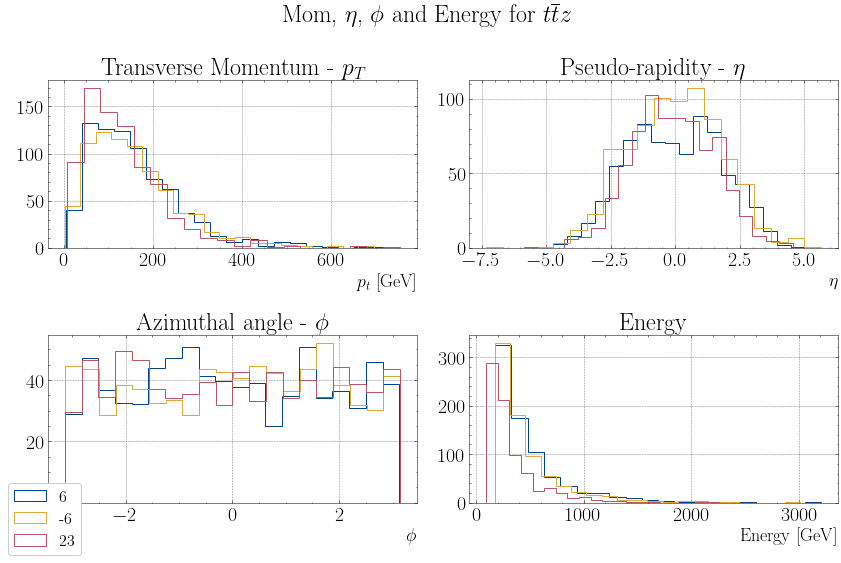

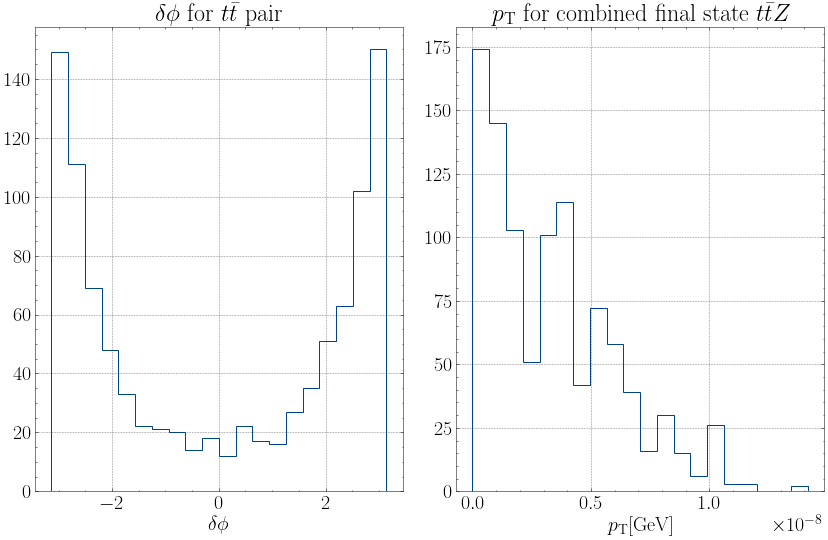

In [17]:
all_pdgids = []
for particle in df['particles'][0]:
    if particle.pdgid not in all_pdgids and not particle.pdgid==21:
        all_pdgids.append(particle.pdgid)
all_weights=[]
for weight in df['weights']:
     all_weights.append(weight['1'])
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    pdgids = np.array(all_pdgids)
    for pdgid in pdgids: 
        vals=[]
        for ind, row in df.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid:
                    vals.append(getattr(particle, param))
        ax.hist(vals,histtype='step', bins=20, label=f"{pdgid}", 
                weights=all_weights
               )
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.suptitle('Mom, $\\eta$, $\\phi$ and Energy for $t\overline{t}z$')
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')


fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df['delta_phi'], histtype='step', bins=20)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$ pair')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df['ptotal'], histtype='step', bins=20)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined final state $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.savefig('ttz_undecayed_plots.png')
plt.show()

## Notes
What do we see
- A correlation between the Energy and transverse momentum. 
- In the azimuthal angle there is an even distribution between $[-\pi, \pi]$
- The total momentum of the $t\bar{t}z$ system is zero
- Pseudorapidity is distributed about 0 

In [ ]:
# With madspin enabled

In [5]:
df2 = pd.read_hdf('event_files/hdf5/ttZ.h5', 'decayed_limited')
 

In [6]:
df2['delta_phi'] = df2.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df2['ptotal'] = df2.apply(lambda r: ptot2(r['particles']), axis=1)

In [ ]:
# all_pdgids = []
# for particle in df2['particles'][0]:
#     if not (particle.status==1) and not particle.pdgid in all_pdgids: 
#         all_pdgids.append(particle.pdgid)
# print(all_pdgids)
particles=[]
for index, row in df2.iterrows():
    for particle in row.particles: 
        particles.append(particle)
print(len(particles))
df_particles = pd.DataFrame.from_dict(particle.__dict__ for particle in particles)
all_pdgids = []
for index, row in df_particles.iterrows():
    if row.pdgid not in all_pdgids and row.status==1 and row.m!=0:
        all_pdgids.append(row.pdgid)
print(all_pdgids)

In [ ]:
issue_pdgids=[2,-1]
some_pdgids = [5,6,-24,13, -14,11]
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    for pdgid in all_pdgids: 
        vals=[]
        for ind, row in df2.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid and particle.m!=0:
                    vals.append(float(getattr(particle, param)))
        ax.hist(vals,histtype='step', bins=10, label=f"{pdgid}")
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')
    
fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df2['delta_phi'], histtype='step', bins=10)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df2['ptotal'], histtype='step', bins=10)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.show()

In [ ]:
data = read_lhe('event_files/lhe/ttZ_we_zmumu_undecayed.lhe')
data2 = read_lhe('event_files/lhe/ttZ_we_zmumu_decayed.lhe')
tohdf5(data, 'event_files/hdf5/ttZ_we_zmumu', key='undecayed_limited', limit_events=False)
tohdf5(data2, 'event_files/hdf5/ttZ_we_zmumu', key='decayed_limited', limit_events=False)

In [7]:
df_undecayed = pd.read_hdf('event_files/hdf5/ttZ_we_zmumu.h5', 'undecayed_limited')
df_decayed = pd.read_hdf('event_files/hdf5/ttZ_we_zmumu.h5', 'decayed_limited')

In [8]:

df_undecayed['delta_phi'] = df_undecayed.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_undecayed['ptotal'] = df_undecayed.apply(lambda r: ptot2(r['particles']), axis=1)

df_decayed['delta_phi'] = df_decayed.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_decayed['ptotal'] = df_decayed.apply(lambda r: ptot2(r['particles']), axis=1)

In [11]:
particles_decayed=[]
for index, row in df_decayed.iterrows():
    for particle in row.particles: 
        particles_decayed.append(particle)
df_particles_decayed = pd.DataFrame.from_dict(particle.__dict__ for particle in particles_decayed)
all_pdgids_decayed = []
all_pdgids_decayed_masses = []
for index, row in df_particles_decayed.iterrows():
    if row.pdgid not in all_pdgids_decayed and row.status==2:
        all_pdgids_decayed.append(row.pdgid)
        all_pdgids_decayed_masses.append(row.m)
print(all_pdgids_decayed,all_pdgids_decayed_masses)

[6, 24, -6, -24, 23] [172.942023296, 80.9744905953, 174.645569606, 80.4113643996, 91.4369705962]


In [ ]:
particles_undecayed=[]
for index, row in df_undecayed.iterrows():
    for particle in row.particles: 
        particles_undecayed.append(particle)
df_particles_undecayed = pd.DataFrame.from_dict(particle.__dict__ for particle in particles_undecayed)
all_pdgids_undecayed = []
for index, row in df_particles_undecayed.iterrows():
    if row.pdgid not in all_pdgids_undecayed and row.status==1:
        all_pdgids_undecayed.append(row.pdgid)
print(all_pdgids_undecayed)

In [ ]:
#     pdgids = np.array([6,-6,23])
vals =[]
for ind, row in df_decayed.iterrows():
    for particle in row.particles:
        total = vector.obj(px=0, py=0, pz=0, E=0).pt
        if abs(particle.pdgid)==13:
            vals.append(particle.pt)
#         print(total)
print(len(vals))
plt.hist(vals,histtype='step', bins=100)
plt.show()

In [2]:
vals=[]
for ind, row in df_decayed.iterrows():
    for particle in row.particles:
        total = vector.obj(px=0, py=0, pz=0, E=0)
        if abs(particle.pdgid)==13:
            total += (particle.fourvec)
#         print(total)
    vals.append(total.e)
vals2=[]
for ind, row in df_decayed.iterrows():
    for particle in row.particles:
        if particle.pdgid==23:
            vals2.append(particle.m)
weights = []
for ind, row in df_decayed.iterrows():
    weights.append(row.weights['1'])
# vals3=[]
# for ind, row in df_decayed.iterrows():
#     for particle in row.particles:
#         if abs(particle.pdgid)==24:
#             vals3.append(particle.m)
plt.hist(vals2, histtype='step', bins =100, label='$Z^0$ - mass', weights=weights)
# plt.hist(vals3, histtype='step', bins =100, label='ws')
plt.hist(vals,histtype='step', bins=100, label='$\mu^+ \mu^-$ pair energy', weights=weights)
plt.xlim(0,500)
plt.legend()
plt.show()

NameError: name 'df_decayed' is not defined

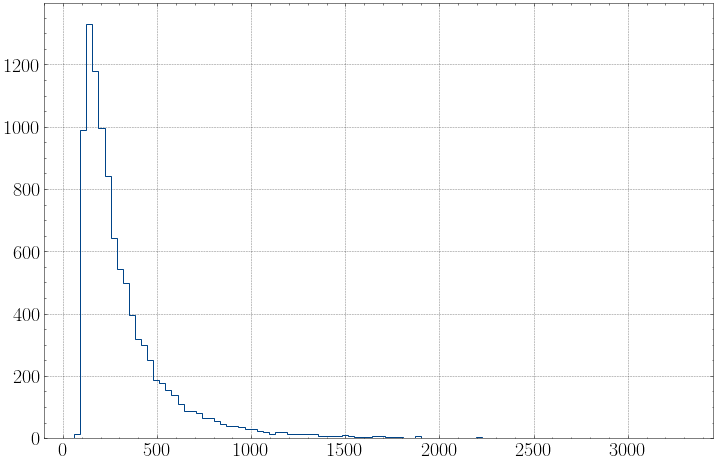

In [67]:
vals2=[]
for ind, row in df_decayed.iterrows():
    for particle in row.particles:
        if particle.pdgid==23:
            vals2.append(particle.e)
plt.hist(vals2, histtype='step', bins =100)
plt.show()

## importing with decays t > e+ ve, t~ > j j (where j includes b )

In [ ]:
# data_zvv_nodecay = read_lhe('event_files/lhe/ttZ_we_wejj_zvv_undecayed.lhe')
# data_zvv_decay = read_lhe('event_files/lhe/ttZ_we_wejj_zvv_decayed.lhe')
# tohdf5(data_zvv_nodecay, 'event_files/hdf5/ttZ_we_wejj_zvv', key='undecayed', limit_events=False)
# tohdf5(data_zvv_decay, 'event_files/hdf5/ttZ_we_wejj_zvv', key='decayed', limit_events=False)

In [5]:
df_zvv_nodecay = pd.read_hdf('event_files/hdf5/ttZ_we_wejj_zvv.h5', 'undecayed')
df_zvv_decay = pd.read_hdf('event_files/hdf5/ttZ_we_wejj_zvv.h5', 'decayed')

In [6]:
df_zvv_nodecay['delta_phi'] = df_zvv_nodecay.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_zvv_nodecay['ptotal'] = df_zvv_nodecay.apply(lambda r: ptot2(r['particles']), axis=1)

df_zvv_decay['delta_phi'] = df_zvv_decay.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_zvv_decay['ptotal'] = df_zvv_decay.apply(lambda r: ptot2(r['particles']), axis=1)

In [7]:
particles_zvv_decay=[]
for index, row in df_zvv_decay.iterrows():
    for particle in row.particles: 
        particles_zvv_decay.append(particle)
df_particles_zvv_decay = pd.DataFrame.from_dict(particle.__dict__ for particle in particles_zvv_decay)
pdgids_zvv_decay = []
for index, row in df_particles_zvv_decay.iterrows():
    if row.pdgid not in pdgids_zvv_decay and (row.status==1 or row.status==2):
        pdgids_zvv_decay.append(row.pdgid)
print(pdgids_zvv_decay)

[6, 5, 24, -11, 12, -6, -5, -24, 3, -4, 23, -13, 13, 1, -2]


[]

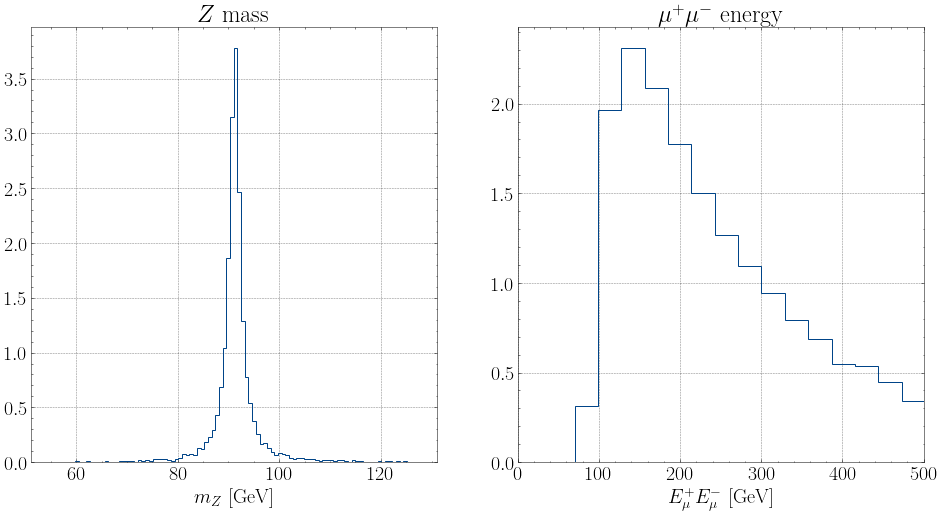

In [50]:
z_mass = []
mu_energy = []
for index,row in df_zvv_decay.iterrows():
    mutotal = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row.particles: 
        if particle.pdgid == 23:
            z_mass.append(particle.m)
        elif abs(particle.pdgid) == 13:
            mutotal += particle.fourvec
    mu_energy.append(mutotal.e) 
weights = []
for ind, row in df_zvv_decay.iterrows():
    weights.append(row.weights['1'])
fig, axes = plt.subplots(1,2)
axes[0].hist(z_mass, histtype='step',weights=weights,bins=100) 
axes[0].set_title('$Z$ mass') 
axes[0].set_xlabel('$m_Z$ [GeV]') 
axes[1].hist(mu_energy, histtype='step',weights=weights,bins=100) 
axes[1].set_title('$\mu^+ \mu^-$ energy') 
axes[1].set_xlabel('$E_\mu^+ E_\mu^-$ [GeV]') 
axes[1].set_xlim(0,500)
plt.savefig('z_mass_mu_pair_e.png')
plt.plot()

[]

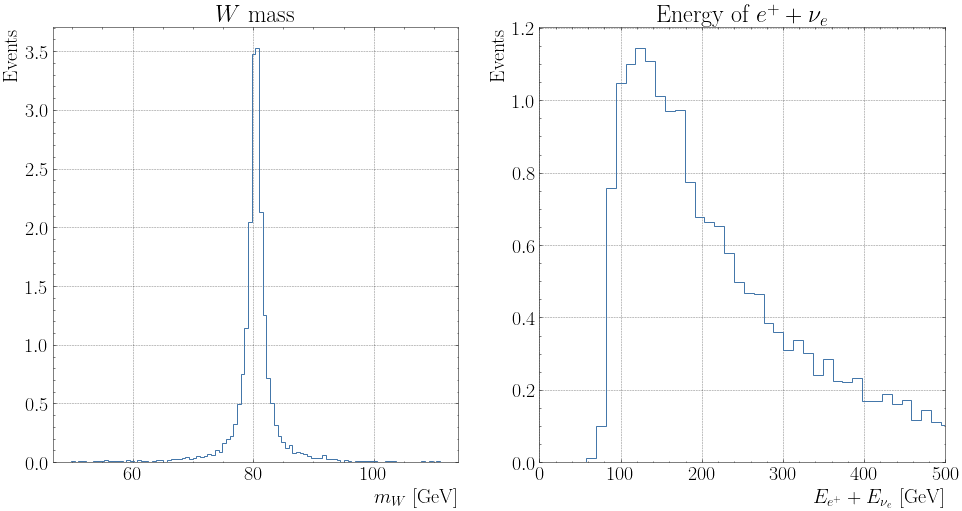

In [90]:
e_nu_energy =[]
W_mass = []

for index, row in df_zvv_decay.iterrows():
    etotal = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row.particles:
        if particle.pdgid == 24:
            W_mass.append(particle.m)
        elif particle.pdgid==-11 or particle.pdgid==12:
            etotal +=(particle.fourvec)
    e_nu_energy.append(etotal.e)
fig,axes= plt.subplots(1,2)
axes[0].hist(W_mass, histtype='step',bins=100,weights=weights) 
axes[0].set_title('$W$ mass')
axes[0].set_xlabel('$m_W \\text{ [GeV]}$',loc='right')
axes[0].set_ylabel('Events', loc='top')
axes[1].hist(e_nu_energy, histtype='step',bins=250,weights=weights) 
axes[1].set_title('Energy of $e^+ + \\nu_e$')
axes[1].set_xlabel('$E_{e^{+}} + E_{\\nu_e} \\text{ [GeV]}$', loc='right')
axes[1].set_ylabel('Events', loc='top')
# plt.legend()
axes[1].set_xlim(0,500)
# plt.title('$W$ mass and the energy of $e^+ \\nu_e$ pair')
plt.savefig('w_mass_enu_energy')
plt.plot()

## Plotting some other variables
- plot M($\mu^+ + \mu^-$)
- plot M($e^+ + \nu_e$)
- plot pT($\mu^+ + \mu^-$) 

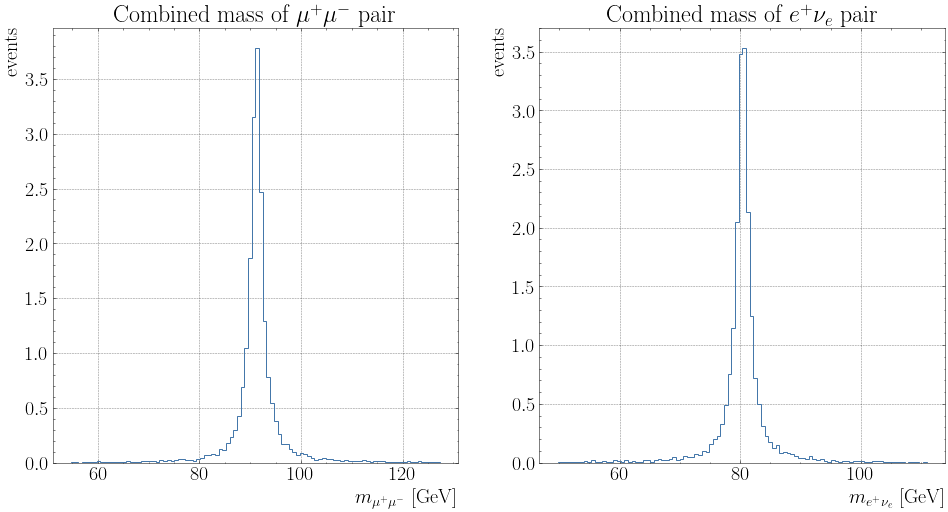

In [110]:
mu_combined_mass = []
e_nu_combined_mass=[]
for index, row in df_zvv_decay.iterrows():
    total = vector.obj(px=0, py=0, pz=0, E=0)
    total2 = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row.particles:
        if abs(particle.pdgid) == 13:
            total += particle.fourvec
        if abs(particle.pdgid)== 11 or abs(particle.pdgid)==12:
            total2 += particle.fourvec
    mu_combined_mass.append(total.m)
    e_nu_combined_mass.append(total2.m)
fig, axes=plt.subplots(1,2)
axes[0].hist(mu_combined_mass, weights=weights, histtype='step', bins=100)
axes[0].set_title('Combined mass of $\mu^+\mu^-$ pair')
axes[0].set_xlabel('$m_{\mu^+\mu^-}$ [GeV]',loc='right')
axes[1].hist(e_nu_combined_mass, weights=weights, histtype='step', bins=100)
axes[1].set_title('Combined mass of $e^{+} \\nu_e$ pair')
axes[1].set_xlabel('$m_{e^{+} \\nu_e}$ [GeV]',loc='right')
axes[0].set_ylabel('events',loc='top')
axes[1].set_ylabel('events',loc='top')
plt.savefig('mass_mumu_enu.png')
plt.show()

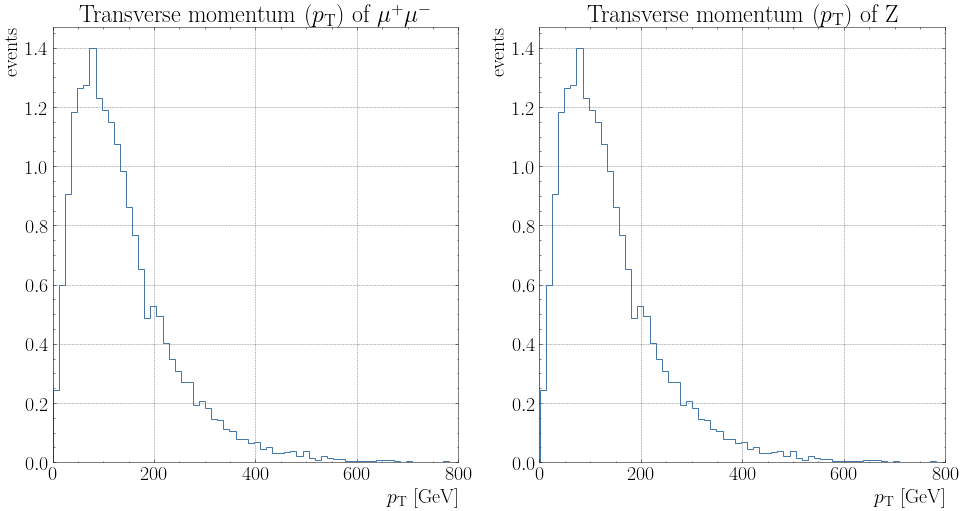

In [112]:
mu_combined_pt = []
z_pt=[]
for index, row in df_zvv_decay.iterrows():
    total_mus = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row.particles:
        if abs(particle.pdgid) == 13:
            total_mus += particle.fourvec
        if abs(particle.pdgid)== 23:
            z_pt.append(particle.pt)
    mu_combined_pt.append(total_mus.pt)
fig, axes=plt.subplots(1,2)
axes[0].hist(mu_combined_pt, label='mu pair', histtype='step', bins=100,weights=weights)
axes[1].hist(z_pt,label='z', histtype='step', bins=100,weights=weights)
axes[0].set_title('Transverse momentum ($p_{\mathrm{T}}$) of $\mu^+ \mu^-$')
axes[1].set_title('Transverse momentum ($p_{\mathrm{T}}$) of Z')
axes[0].set_xlabel('$p_{\mathrm{T}}$ [GeV]', loc='right')
axes[1].set_xlabel('$p_{\mathrm{T}}$ [GeV]', loc='right')
axes[0].set_ylabel('events',loc='top')
axes[1].set_ylabel('events',loc='top')
axes[0].set_xlim(0,800)
axes[1].set_xlim(0,800)
plt.savefig('pt_mumu_z.png')
plt.show()
